In [4]:
from tensorflow import keras
from keras import layers
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Dropout
import numpy as np
import matplotlib.pyplot as plt


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [8]:
X_train = train_images
Y_train = train_labels
X_test = test_images
Y_test = test_labels

In [9]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255


In [14]:
X_train.shape

(60000, 28, 28, 1)

In [10]:
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

In [13]:
Y_train = keras.utils.to_categorical(Y_train)
Y_test = keras.utils.to_categorical(Y_test)

In [34]:
model = Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
                        input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())

model.add(Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))


In [35]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 1, 1, 64)         

In [36]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [37]:
history = model.fit(X_train, Y_train,
          epochs=25, batch_size=64, validation_data=(X_test,Y_test))

Epoch 1/25
938/938 [==============================] - 9s 9ms/step - loss: 0.8144 - accuracy: 0.7094 - val_loss: 0.5332 - val_accuracy: 0.8058
Epoch 2/25
938/938 [==============================] - 8s 9ms/step - loss: 0.5720 - accuracy: 0.7956 - val_loss: 0.4705 - val_accuracy: 0.8274
Epoch 3/25
938/938 [==============================] - 12s 13ms/step - loss: 0.5052 - accuracy: 0.8182 - val_loss: 0.4146 - val_accuracy: 0.8501
Epoch 4/25
938/938 [==============================] - 12s 13ms/step - loss: 0.4642 - accuracy: 0.8347 - val_loss: 0.3855 - val_accuracy: 0.8606
Epoch 5/25
938/938 [==============================] - 13s 13ms/step - loss: 0.4311 - accuracy: 0.8440 - val_loss: 0.3816 - val_accuracy: 0.8614
Epoch 6/25
938/938 [==============================] - 12s 13ms/step - loss: 0.4056 - accuracy: 0.8554 - val_loss: 0.3631 - val_accuracy: 0.8676
Epoch 7/25
938/938 [==============================] - 12s 13ms/step - loss: 0.3878 - accuracy: 0.8603 - val_loss: 0.3473 - val_accuracy: 0.8

In [38]:
results = model.evaluate(X_test, Y_test)

print('Final test set loss: {:4f}'.format(results[0]))
print('Final test set accuracy: {:4f}'.format(results[1]))

313/313 [==============================] - 1s 3ms/step - loss: 0.3067 - accuracy: 0.8941
Final test set loss: 0.306673
Final test set accuracy: 0.894100


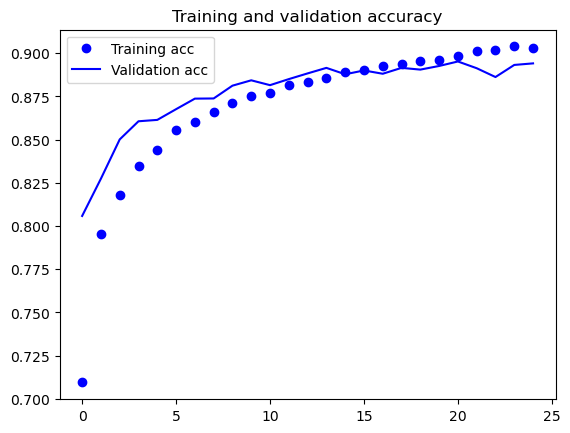

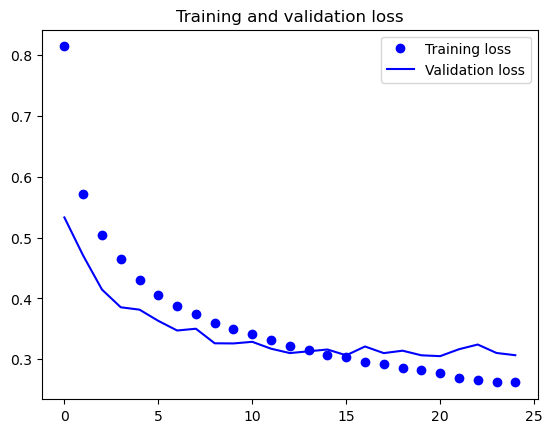

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()